In [1]:
import numpy as np
from conv_fft import *
from skimage.draw import disk
import matplotlib.pyplot as plt

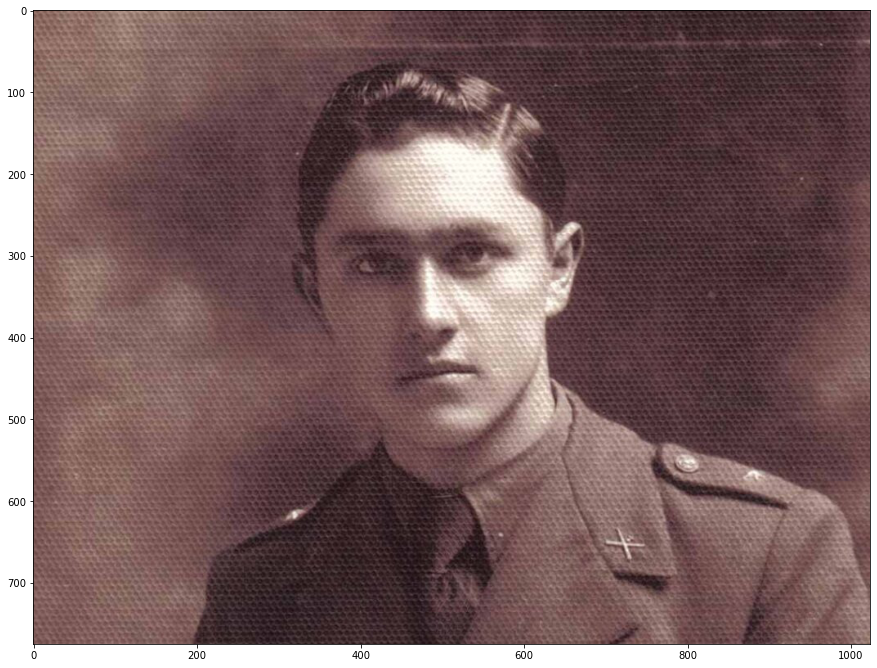

In [2]:
original = plt.imread('images/old.jpg')
plt.figure(figsize=(15,15))
plt.imshow(original)
plt.show()

In [3]:
%%time
# padding to power of 2
f=np.pad(original,((0,249),(0,0),(0,0)))
f_hat=fft2(f,axes=(0,1))
shifted=np.fft.fftshift(f_hat)

CPU times: user 1.8 s, sys: 188 ms, total: 1.98 s
Wall time: 1.74 s


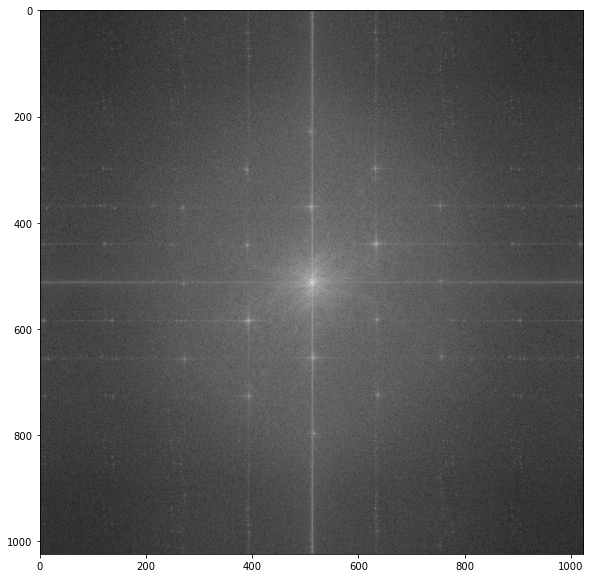

In [4]:
# magnitude and phase
mag=np.abs(shifted)
phase=np.unwrap(np.angle(shifted))

plt.figure(figsize=(10,10))
plt.imshow(np.log(1+np.linalg.norm(mag,axis=-1)),cmap='gray')
plt.show()

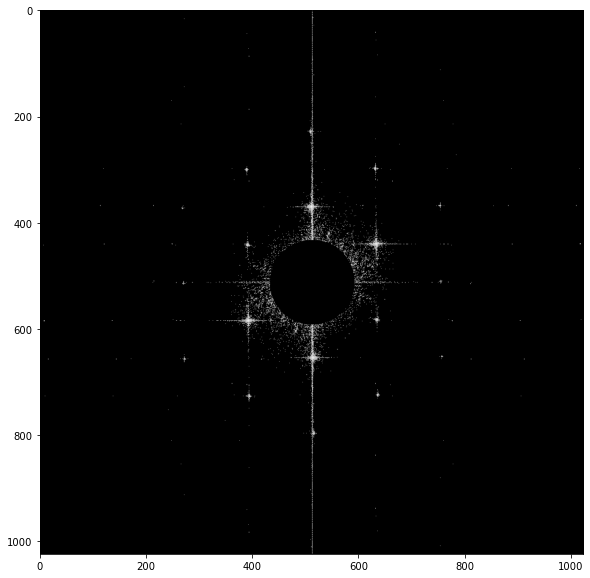

In [5]:
# strong peaks
mag_norm=np.linalg.norm(mag,axis=-1).copy() # red channel

rr,cc=disk((512,512),80)
mag_norm[rr, cc]=0
mag_norm[mag_norm<mag_norm.max()*0.01]=0

plt.figure(figsize=(10,10))
plt.imshow(np.log(1+mag_norm),cmap='gray')
plt.show()

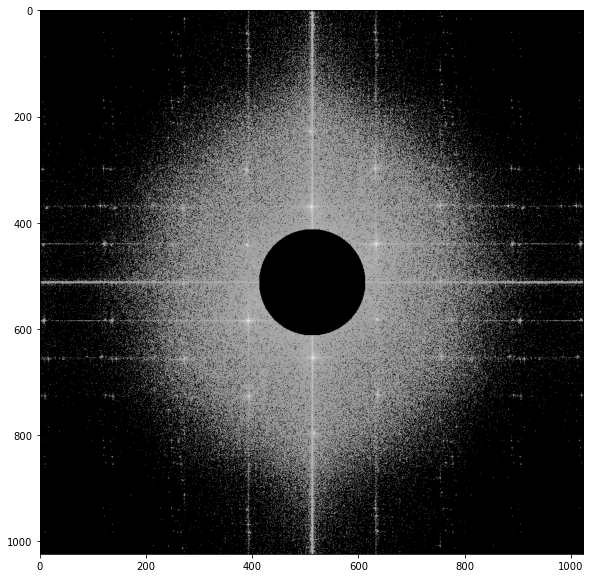

In [6]:
# weak peaks
mag_norm=np.linalg.norm(mag,axis=-1).copy() # red channel

rr,cc=disk((512,512),100)
mag_norm[rr, cc]=0
mag_norm[mag_norm<mag_norm.max()*0.001]=0

plt.figure(figsize=(10,10))
plt.imshow(np.log(1+mag_norm),cmap='gray')
plt.show()

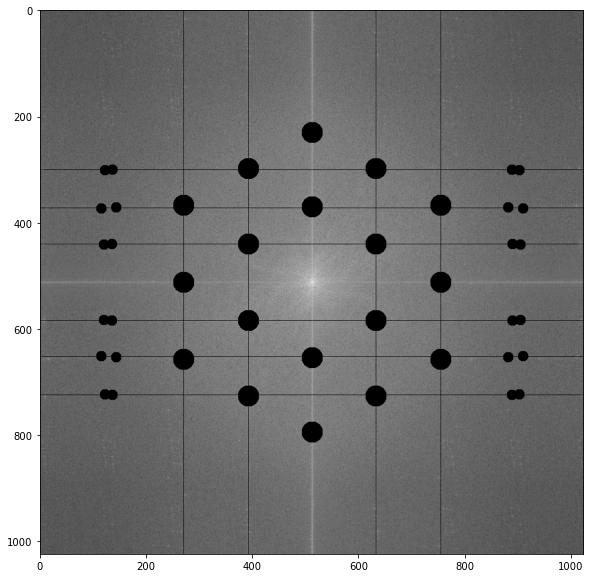

In [7]:
# set periodic patterns to zero
centers_strong=[(230,512),(370,512),(298,632),(440,632),(512,754),(367,754)]
for r,c in centers_strong:
    for center in [(r,c),(1024-r,c),(r,1024-c),(1024-r,1024-c)]:
        rr,cc=disk(center,20)
        mag[rr, cc]=0

centers_weak=[(300,888),(301,902),(373,909),(371,881),(441,904),(440,889)]
for r,c in centers_weak:
    for center in [(r,c),(1024-r,c),(r,1024-c),(1024-r,1024-c)]:
        rr,cc=disk(center,10)
        mag[rr, cc]=0

mag[:,632]=0
mag[:,754]=0
mag[:,1024-632]=0
mag[:,1024-754]=0

mag[300,:]=0
mag[372,:]=0
mag[440,:]=0
mag[1024-300,:]=0
mag[1024-372,:]=0
mag[1024-440,:]=0
plt.figure(figsize=(10,10))
plt.imshow(np.log(1+np.linalg.norm(mag,axis=-1)),cmap='gray')
plt.show()

In [8]:
%%time
# combine
m=mag*np.exp(1j*phase)
m=np.fft.ifftshift(m)
m=np.real(ifft2(m,axes=(0,1)))[:775,...]

CPU times: user 2.61 s, sys: 228 ms, total: 2.83 s
Wall time: 2.83 s


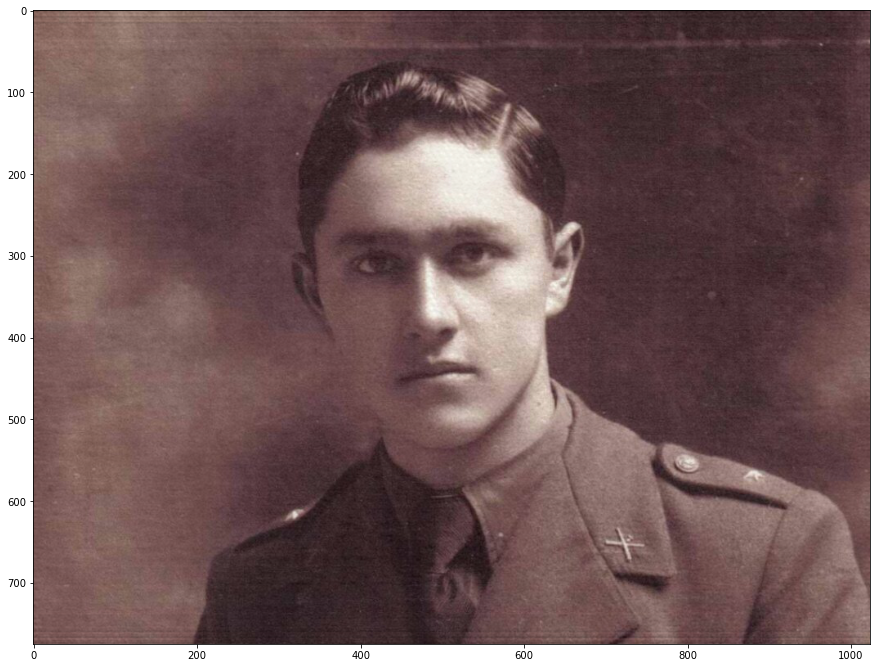

In [9]:
m/=m.max()
plt.figure(figsize=(15,15))
plt.imshow(m)
plt.show()

In [10]:
from PIL import Image
s=(m*255).astype(np.uint8)
f=Image.fromarray(s)
f.save('images/new.jpg')